In [1]:
import numpy as np
import h5py
import glob
from pycbc import conversions
from pycbc import coordinates

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width*2,fig_height*4]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 18,
          'ytick.labelsize': 24,
          'axes.grid' : False,
          'text.usetex': False,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
path = ['./shilpadata','./yifandata','./sumitdata']
posfile = []
for p in path:
    f = glob.glob(p+'/*.hdf')
    posfile.extend(f)

In [4]:
def custom_sort(name):
    return name.split('/')[2]
#the 0th is dot, 1st is person name, 2nd is GW event name

def extract_quantile(sample):
    return np.quantile(sample,0.5), np.quantile(sample,0.95) - np.quantile(sample,0.5), \
                                             np.quantile(sample,0.5) - np.quantile(sample,0.05)

In [5]:
def latexpm(num,p,m,nround=1):
    if nround == 0:
        num,p,m = round(num),round(p),round(m)
    else:
        num,p,m = round(num,nround),round(p,nround),round(m,nround)
    return str(r'$'+str(num)+r'^{+'+str(p)+r'}_{-'+str(m)+r'}$')

In [6]:
posfile.sort(key=custom_sort)

In [14]:
m1 = []
m2 = []
chi_eff = []
dist = []
labels = []

In [15]:
for i,path in enumerate(posfile):
    f = h5py.File(path,'r')
    #print('Analyzing the '+str(i)+'th event:'+path)
    
    #m1,m2,mc,q
    m1.append(f['samples']['srcmass1'][()])
    m2.append(f['samples']['srcmass2'][()])
    chi_eff.append(f['samples']['chi_eff'][()])
    dist.append(f['samples']['distance'][()])

    #name
    oldname = path.split('/')[2].split('-')[0]
    #name = oldname[:8]+r'\_' +oldname[9:11]+':'+oldname[11:13]+':'+oldname[13:15]
    name = oldname[:8]+'_'+oldname[9:]
    labels.append(name)

    f.close()

In [16]:
def set_axis_style(ax, labels,hide=False):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    if hide==True:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Gravitational-Wave Events')

In [36]:
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
alpha = [0.9,0.7,0.55,0.45,0.3,0.1]

In [37]:
def dividesix(i):
    return i//6,i%6

In [38]:
def adjust_plot(violin_parts,alpha=1.0,color='black'):
    for pc in violin_parts['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(alpha)

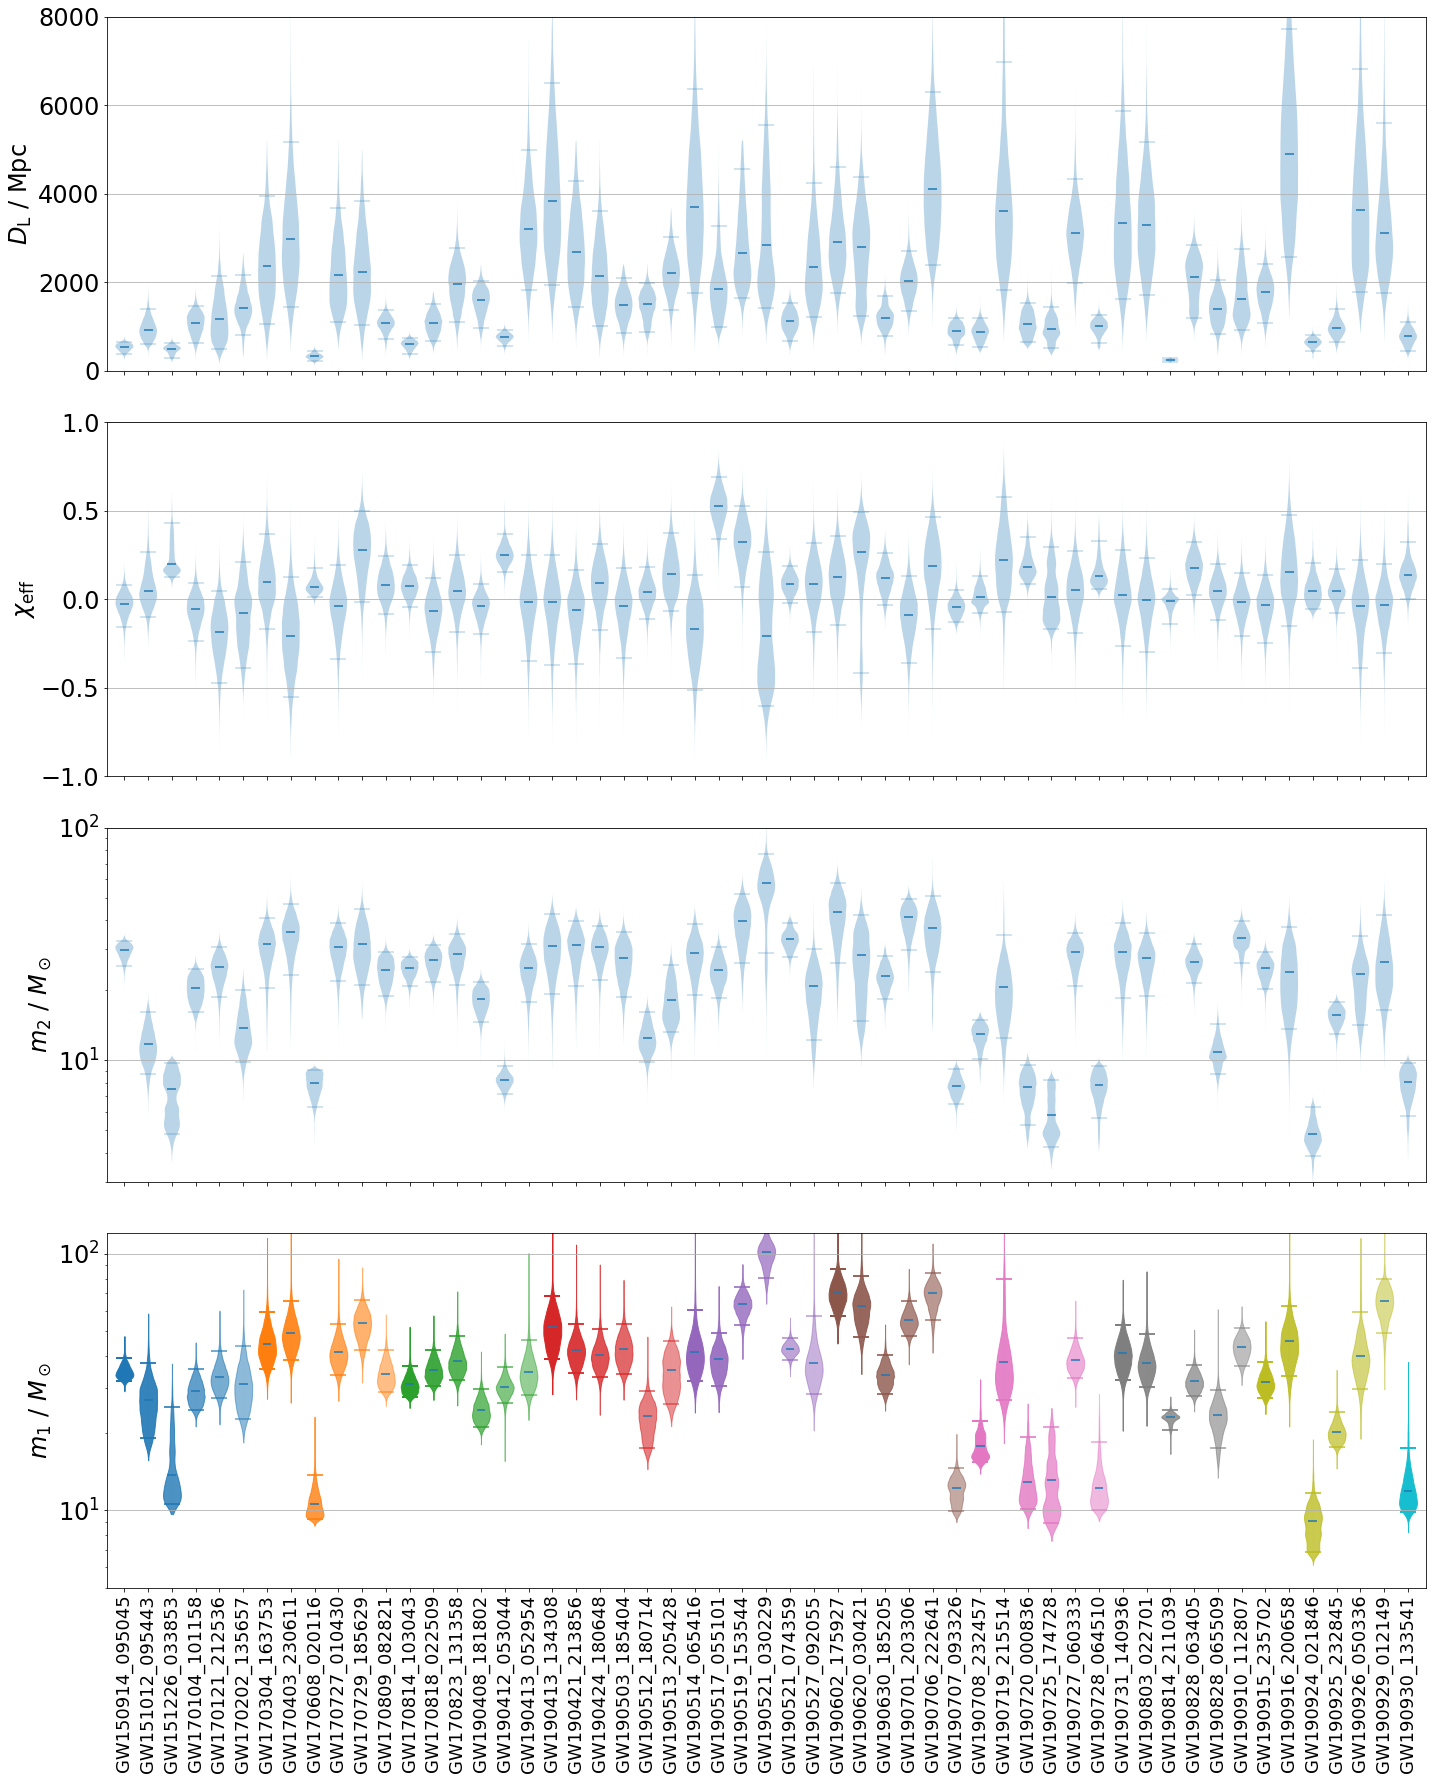

In [35]:
fig = plt.figure();
#ax m1
ax = fig.add_subplot(414);
#bx m2
bx = fig.add_subplot(413);
#cx m3
cx = fig.add_subplot(412);
#dx d
dx = fig.add_subplot(411);

################ m1 ################
violinparts = ax.violinplot(m1, 
          showmeans=False, 
          showmedians=True, 
          showextrema=False, 
          vert=True, 
          widths=0.75)
for i,pc in enumerate(violinparts['bodies']):
    ind1,ind2 = dividesix(i)
    pc.set_facecolor(color[ind1])
    pc.set_edgecolor(color[ind1])
    pc.set_alpha(alpha[ind2])

for i,d in enumerate(m1):
    x = np.median(d)
     #print i,x                 
    dx_l,dx_u = np.percentile(d,[5]),np.percentile(d,[95])
    err_low= np.abs(x-dx_l)
    err_high = np.abs(dx_u-x)
    ind1,ind2 = dividesix(i)
    ax.errorbar(i+1,x,yerr=[err_low,err_high],ecolor=color[ind1],alpha=alpha[ind2],
                        marker=None, capthick=2, capsize=8, linewidth=0.01)
    
set_axis_style(ax, labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_yscale('log')
ax.set_ylabel(r'$m_1 ~/~M_\odot$')
ax.set_ylim(5,120)
[i.set_color("red") for i in plt.gca().get_xticklabels()]

################ m2 ################
violinparts = bx.violinplot(m2, 
          showmeans=False, 
          showmedians=True, 
          showextrema=False, 
          vert=True, 
          widths=0.75)

for i,d in enumerate(m2):
    x = np.median(d)
     #print i,x                 
    dx_l,dx_u = np.percentile(d,[5]),np.percentile(d,[95])
    err_low= np.abs(x-dx_l)
    err_high = np.abs(dx_u-x)
    bx.errorbar(i+1,x,yerr=[err_low,err_high],ecolor='tab:blue',alpha=0.2,
                        marker=None, capthick=2, capsize=8, linewidth=0.01)
    
bx.set_ylabel(r'$m_2 ~/~M_\odot$')
bx.set_ylim(3,100)
bx.set_yscale('log')
set_axis_style(bx, labels,hide=True)
        
############## chieff ##############
violinparts = cx.violinplot(chi_eff, 
          showmeans=False, 
          showmedians=True, 
          showextrema=False, 
          vert=True, 
          widths=0.75)

for i,d in enumerate(chi_eff):
    x = np.median(d)
     #print i,x                 
    dx_l,dx_u = np.percentile(d,[5]),np.percentile(d,[95])
    err_low= np.abs(x-dx_l)
    err_high = np.abs(dx_u-x)
    cx.errorbar(i+1,x,yerr=[err_low,err_high],ecolor='tab:blue',alpha=0.2,
                        marker=None, capthick=2, capsize=8, linewidth=0.01)
    
cx.set_ylabel(r'$\chi_\mathrm{eff}$')
set_axis_style(cx, labels,hide=True)    
cx.set_ylim(-1,1)
############## distance ##############
violinparts = dx.violinplot(dist, 
          showmeans=False, 
          showmedians=True, 
          showextrema=False, 
          vert=True, 
          widths=0.75)

for i,d in enumerate(dist):
    x = np.median(d)
     #print i,x                 
    dx_l,dx_u = np.percentile(d,[5]),np.percentile(d,[95])
    err_low= np.abs(x-dx_l)
    err_high = np.abs(dx_u-x)
    dx.errorbar(i+1,x,yerr=[err_low,err_high],ecolor='tab:blue',alpha=0.2,
                        marker=None, capthick=2, capsize=8, linewidth=0.01)
    
dx.set_ylabel(r'$D_\mathrm{L}~/~\mathrm{Mpc}$')
set_axis_style(dx, labels,hide=True)    
dx.set_ylim(0,8000)
#ax.get_yticklabels(),ax.get_yticks()
ax.yaxis.grid(True)
bx.yaxis.grid(True)
cx.yaxis.grid(True)
dx.yaxis.grid(True)
fig.tight_layout()
fig2 = fig

In [33]:
for i,pc in enumerate(violinparts['bodies']):
    pc.set_facecolor('red')
    pc.set_edgecolor('black')

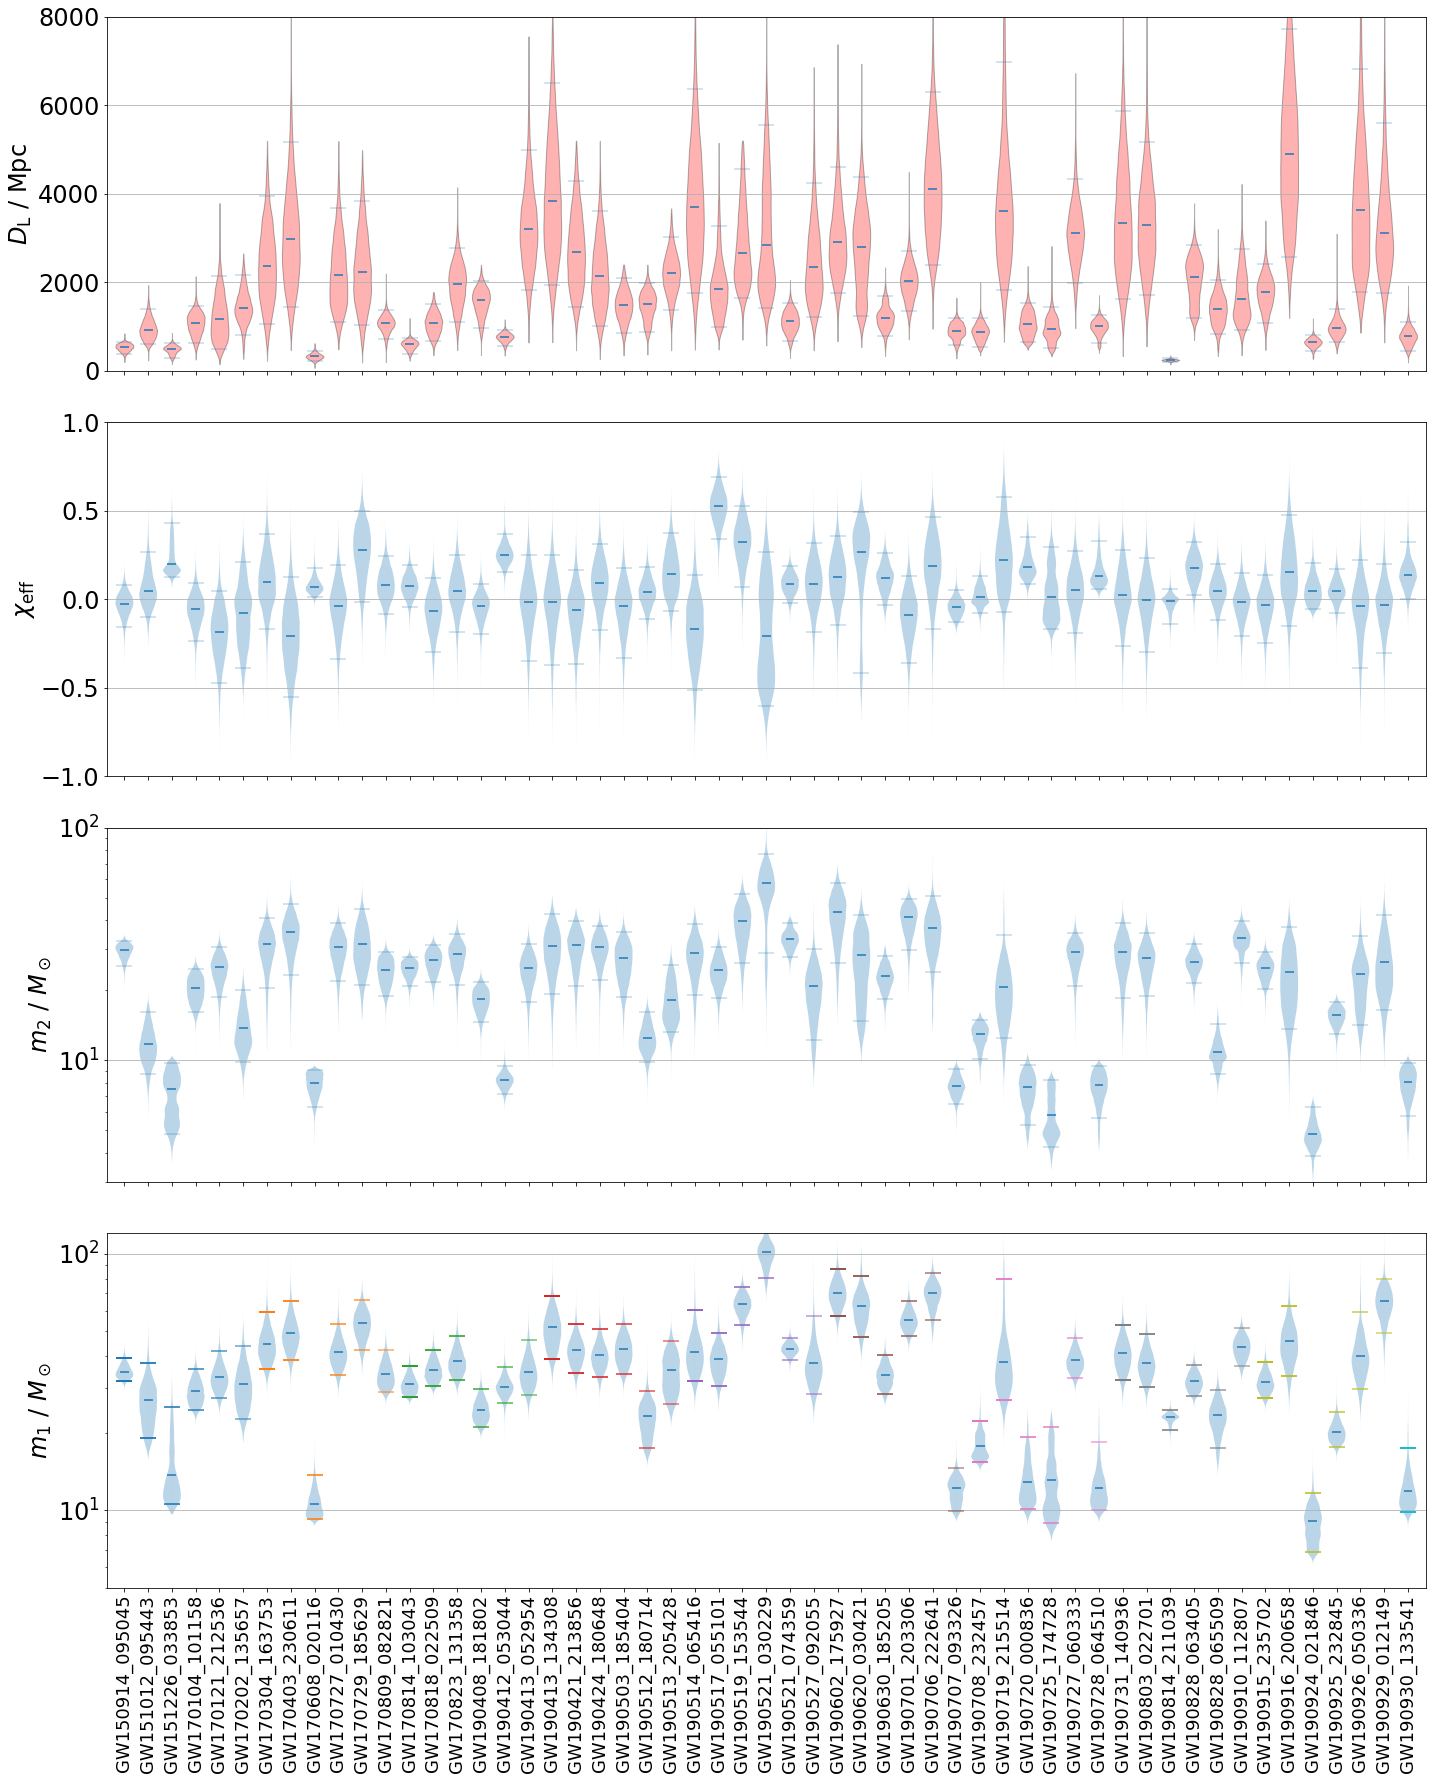

In [34]:
fig

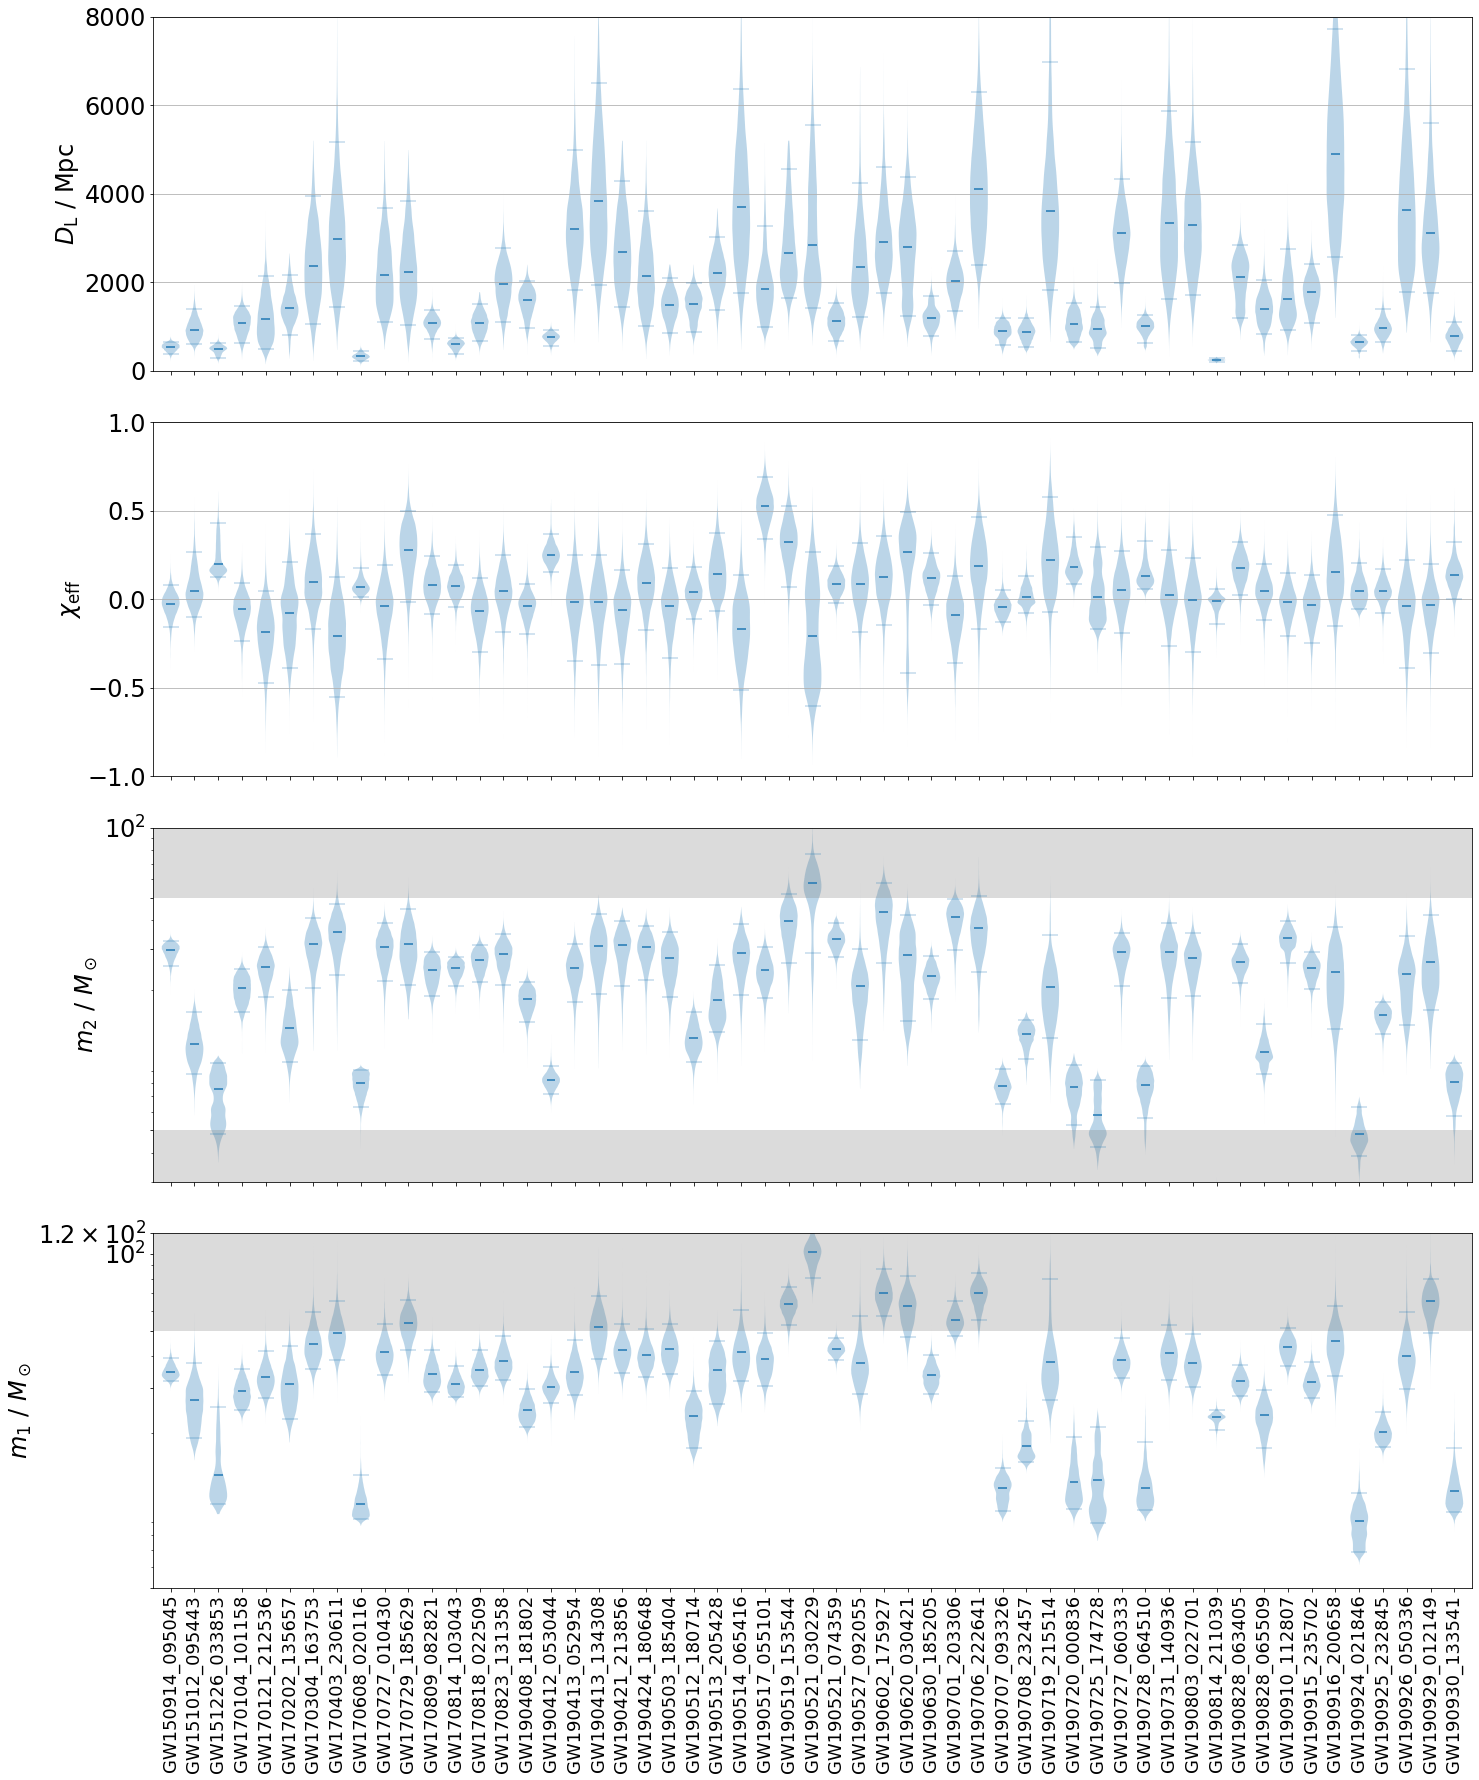

In [27]:
ax.yaxis.grid(False)
bx.yaxis.grid(False)
x = np.arange(0,57)
#ax.set_yticks([5,30,50,100,120])
#bx.set_yticks([5,30,50,100])
ax.fill_between(x, 3, 5,facecolor='gray',alpha=0.1)
bx.fill_between(x, 3, 5,facecolor='gray',alpha=0.1)
ax.fill_between(x, 50, 120,facecolor='gray',alpha=0.1)
bx.fill_between(x, 50, 120,facecolor='gray',alpha=0.1)
fig